In [ ]:
Student Name: Sung Hoon Bae

Instructor Name: James Irving

Review Date: 12/08/2020

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.pipeline import Pipeline
import spacy
# from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB

import re

# import src.useful_codes as uc

print(tf.__version__)

2.3.1


# Data
We will be building our twitter sentiment model using a dataset that contains 1.4 million tweets provided by Kaggle. If you wish to download the dataset, you can go to this <a href='https://www.kaggle.com/kazanova/sentiment140'>LINK</a> to access the dataset.

In [3]:
# importing data
columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
permanent = pd.read_csv('datasets/tweet_sentiments.csv',
                        encoding='latin', header=None)
permanent.columns = columns

FileNotFoundError: ignored

# Google Colab

Use the following codes if using Google Colab

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
DATA_PATH = 'drive/MyDrive/dataset/twitter_sentiment/'

In [8]:
# importing data
columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
permanent = pd.read_csv(DATA_PATH+'/tweet_sentiments.csv',
                        encoding='latin', header=None)
permanent.columns = columns

Since we only care about the texts and their sentiments, we will drop other columns.

In [9]:
permanent = permanent[['sentiment', 'text']]

In [10]:
# Changes 0, 4 into categorical values: Negative and Positive
sentiment_dict = {0:'Negative', 4:'Positive'}
permanent['sentiment'] = permanent['sentiment'].apply(lambda x: sentiment_dict[x]);

[Text(0, 0.5, 'Number of Tweets'),
 Text(0.5, 0, 'Sentiment'),
 Text(0.5, 1.0, 'Sentiment Distribution')]

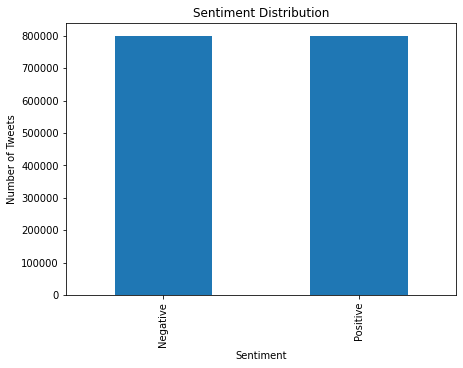

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
permanent['sentiment'].value_counts().plot(kind='bar')
ax.set(xlabel='Sentiment', ylabel='Number of Tweets', title='Sentiment Distribution')

Lovely! No class imbalance!

In [ ]:
# Define X and y
X = permanent['text']
y = permanent['sentiment']

# Splits test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.005, random_state=42)

# Splits traint set into train and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.70, random_state=42)

In [ ]:
# Initiates models
nb = MultinomialNB()
lr = LogisticRegression(solver='liblinear')

In [ ]:
data = {'X': X_train, 'y': y_train}

In [ ]:
tfidf = TfidfVectorizer(tokenizer=uc.clean_text,
                        ngram_range=(1,3),
                        max_features=2000,
                        min_df=5, max_df=0.2)

              precision    recall  f1-score   support

    Negative       0.75      0.76      0.75     20132
    Positive       0.75      0.75      0.75     19868

    accuracy                           0.75     40000
   macro avg       0.75      0.75      0.75     40000
weighted avg       0.75      0.75      0.75     40000



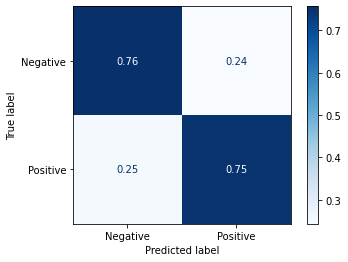

In [ ]:
"""
tfidf = TfidfVectorizer(tokenizer=uc.clean_text,
                        ngram_range=(1,3),
                        max_features=2000,
                        min_df=5, max_df=0.2)
"""
nb_tfidf_model, report = uc.evaluate_binary_model(label='NB_lg_tfidf',
                                                  model='NB',
                                                  vectorizer=tfidf,
                                                  data=data)

In [ ]:
report

{'label': 'NB_lg_tfidf',
 'run_time': 1703.390268087387,
 'train_row': 120000,
 'test_row': 40000,
 'total_row': 160000,
 'negative_recall': 0.7564573812835287,
 'positive_recall': 0.7486410308033018,
 'test_accuracy': 0.752575,
 'average_time': 0.01064618917554617}

In [ ]:
uc.save_data(nb_tfidf_model, 'models/nb_tfidf_model')

In [ ]:
uc.save_data(report, 'models/nb_tfidf_model_report')

In [ ]:
binary_model = uc.load_data('models/nb_tfidf_model')

def prototype(model='binary'):
    user_input = input('Write a review: ')
    
#     text = get_clean_text(user_input)
#     word_emb = get_vector(text)
    if model=='binary':
        model = binary_model
    else:
        model = multiclass_word_emb
    print('-'*30)
#     print('Product: ', predict_product(text))
    print('Sentiment: ', predict_sentiment(model, user_input))
    print('Confidence: ', round(get_confidence(model, user_input)*100, 2), '%')
    print('-'*30)
    print('\n')
def get_clean_text(text):
    text = ' '.join(uc.clean_text(text))
    return text

def get_vector(text):
    word_emb = np.concatenate(uc.get_vec(text).reshape(-1,1), axis=0).reshape(-1, 300)
    return word_emb

def predict_sentiment(model, text):
    predict = model.predict([text])
    return predict[0]

def predict_product(text):
    predict = product_predictor.predict(text)
    return predict[0]

def get_confidence(model, text):
    prob = model.predict_proba([text])
    return max(prob[0])

In [ ]:
while True:
    prototype()

Write a review: d
------------------------------
Sentiment:  Positive
Confidence:  50.08 %
------------------------------


Write a review: do it
------------------------------
Sentiment:  Positive
Confidence:  50.08 %
------------------------------


Write a review: love it
------------------------------
Sentiment:  Positive
Confidence:  76.9 %
------------------------------


Write a review: hate it
------------------------------
Sentiment:  Negative
Confidence:  86.47 %
------------------------------


Write a review: luvin it
------------------------------
Sentiment:  Positive
Confidence:  50.08 %
------------------------------


Write a review: luv
------------------------------
Sentiment:  Positive
Confidence:  72.2 %
------------------------------


Write a review: lov
------------------------------
Sentiment:  Positive
Confidence:  50.08 %
------------------------------


Write a review: love
------------------------------
Sentiment:  Positive
Confidence:  76.9 %
--------------

KeyboardInterrupt: 

In [ ]:
from spacy import displacy

In [ ]:
user_input = input('write text: ')
doc = nlp(user_input)
displacy.render(doc, style='ent', jupyter=True)

write text: this Iphone is amazing


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
X_train

1129267    @Juneya But I bet he likes them, maybe even ju...
210387     Just finished four hours of cleaning ... exhau...
33635                                back at work, booooooo 
27043      it would be much better if all my friends woul...
708669                                 Also: I am a fatass. 
                                 ...                        
259178     this song's middle change just doesn't want to...
1414414                 @officialnjonas Good luck with that 
131932              @ProudGamerTweet I rather average 32370 
671155     Pickin up @misstinayao waitin on @sadittysash ...
121958     @ home studying for maths wooot ! im so going ...
Name: text, Length: 8000, dtype: object

# Deep NLP

In [11]:
# Define X and y
X = permanent['text']
y = permanent['sentiment']

# Splits test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.01, random_state=42)

# Splits traint set into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.50, random_state=42)

In [12]:
X_train = pd.DataFrame(X_train)
X_train.columns = ['text']
X_train['clean'] = X_train['text'].apply(uc.clean_text)

NameError: ignored

In [31]:
X_train

[array([[  101,  4122,  2000, ...,     0,     0,     0],
        [  101,  1030,  9092, ...,     0,     0,     0],
        [  101, 14743,  1012, ...,     0,     0,     0],
        ...,
        [  101,  4671,  9260, ...,     0,     0,     0],
        [  101,  2003,  3913, ...,     0,     0,     0],
        [  101, 22091,  2860, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

padded_shapes = ([None], ())

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(encoder.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(dataset, epochs=5, validation_data=test_dataset,
          validation_steps=30)

# Deep NLP using Ktrain

In [13]:
# Splits test set
data_train, data_test = train_test_split(permanent, train_size=0.05, random_state=42)

# Splits traint set into train and validation set
data_train, data_val = train_test_split(data_train, train_size=0.70, random_state=42)

In [14]:
nlp = spacy.load('en_core_web_sm')

In [15]:
def clean_text(text, stopwords=False, tweet=True):
    """
    Cleans and tokenizes tweet text data.
    Args:
        text (str): tweet text data
        
        stopwords (bool): True if stopwords needs to be removed
        
        tweet (bool): True if text data are tweets.
    
    Returns:
        tokens (array): Array of tokenized words from given text.
    """

    if tweet:
        # text = re.sub(r'@\S+', '', text) # Gets rid of any mentions
        text = re.sub(r'RT\S+', '', text) # Gets rid of any retweets
        text = re.sub(r'#', '', text) # Gets rid of hashtag sign
        text = re.sub(r'https?:\/\/\S+', '', text) # Gets rid of any links
        # text = re.sub(r'[0-9]+.?[0-9]+', '', text) # Gets rid of X.X where X are numbers
        text = re.sub(r'#?(sx|Sx|SX)\S+', '', text) # Gets rid common mentions
        text = re.sub(r'(&quot;|&Quot;)', '', text) # Gets rid of quotes    
        text = re.sub(r'(&amp;|&Amp;)', '', text) # Gets rid of quotes
        text = re.sub(r'link', '', text) # Gets rid of quotes
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-': # if token is not a pronoun
            temp_token = token.lemma_.lower().strip()
        else:
            temp_token = token.lower_
        tokens.append(temp_token)
    
    if stopwords:
        tokens_stopped = [token for token in tokens if token not in stopwords_list]
    else:
        tokens_stopped = tokens
    
    return ' '.join(tokens_stopped)

In [16]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 2.0MB/s 
     |████████████████████████████████| 983kB 47.2MB/s 
     |████████████████████████████████| 266kB 43.9MB/s 
     |████████████████████████████████| 1.3MB 42.8MB/s 
     |████████████████████████████████| 471kB 49.3MB/s 
     |████████████████████████████████| 890kB 38.3MB/s 
     |████████████████████████████████| 2.9MB 47.9MB/s 
     |████████████████████████████████| 1.1MB 43.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.0-cp36-none-any.whl size=25274500 sha256=30cd6a9a97405426da29df8f1bfe7b6c865fbd9dc878b74954b82b62372e7022
  Stored in directory: /root/.cache/pip/wheels/5c/73/05/f36d0027bb6575384e21506dbba8db36a7825f15a24f09b2d5
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=5b7a1186ce83d8b4831ff68d87077aa3737f6880013f0d9e423308e43aee7418
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [17]:
data_train['clean_text'] = data_train['text'].apply(clean_text)

In [18]:
data_val['clean_text'] = data_val['text'].apply(clean_text)

In [ ]:
data_train.to_csv(DATA_PATH,'data_train.csv')
data_val.to_csv(DATA_PATH,'data_val.csv')

In [19]:
import ktrain
from ktrain import text

In [40]:
data_train

,sentiment,text,clean_text
1581102,Positive,@FeeshaC I read Brida already. It's an okay bo...,@feeshac i read brida already . it be an okay ...
356348,Negative,WHY WAIT AGAIN? I absolutely HATE waiting! one...,why wait again ? i absolutely hate wait ! one ...
1199758,Positive,#fr @zalete hey any pointer?,fr @zalete hey any pointer ?
1369983,Positive,My niece is here shhhhhh she's asleep,my niece be here shhhhhh she be asleep
149336,Negative,@SleeplessInATX didn't make it 2 the Frank Gom...,@sleeplessinatx do not make it 2 the frank gom...
...,...,...,...
533299,Negative,anyone got a job for me? i'm so looking for a ...,anyone get a job for me ? i be so look for a j...
1291820,Positive,love to @kaliie for buying me english lollies ...,love to @kaliie for buy me english lolly ( whi...
157462,Negative,express editing... no fun!!,express editing ... no fun ! !
1055327,Positive,Is layin out,be layin out


In [35]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train, 
                                                                       text_column = 'text',
                                                                       label_columns = 'sentiment',
                                                                       val_df = data_val,
                                                                       max_features=35000,
                                                                       maxlen = 512,
                                                                       preprocess_mode = 'bert')

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [36]:
# creates model
model = text.text_classifier(name='bert',
                             train_data = (X_train, y_train),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 512
done.


In [37]:
# Get learning rate
learner = ktrain.get_learner(model = model, 
                             train_data = (X_train, y_train),
                             val_data = (X_test, y_test),
                             batch_size = 8) # max_len determines the batch size

In [27]:
# this might take days to run!!!!!
learner.lr_find(max_epochs=3) # finds best learning rate
learner.lr_plot() # plots learning rate
# Optimal learning rate for this model is _________.

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
7000/7000 [==============================] - 3475s 496ms/step - loss: 0.0618 - accuracy: 0.9810
Epoch 2/3
7000/7000 [==============================] - 3471s 496ms/step - loss: 0.2192 - accuracy: 0.9125


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


TypeError: ignored

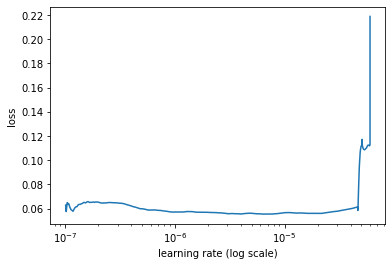

In [28]:
learner.lr_plot() 

In [23]:
learner.fit_onecycle(lr = 5e-5, epochs = 3)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/3
7000/7000 [==============================] - 3830s 547ms/step - loss: 0.4125 - accuracy: 0.8127 - val_loss: 0.3947 - val_accuracy: 0.8249
Epoch 2/3
7000/7000 [==============================] - 3823s 546ms/step - loss: 0.3440 - accuracy: 0.8532 - val_loss: 0.3835 - val_accuracy: 0.8336
Epoch 3/3
7000/7000 [==============================] - 3820s 546ms/step - loss: 0.1698 - accuracy: 0.9357 - val_loss: 0.4731 - val_accuracy: 0.8358


In [25]:
# predictor
predictor = ktrain.get_predictor(learner.model, preprocess)
MODEL_PATH = 'drive/MyDrive/models/'
# saves the model
predictor.save(MODEL_PATH+'BERT_1') #ngram_5, max_len_400, max_feature20000



In [ ]:
predictor = ktrain.load_predictor('/tmp/mymnist')

In [33]:
learner.fit_onecycle(lr = 1e-5, epochs = 5)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/5
7000/7000 [==============================] - 4394s 628ms/step - loss: 0.4422 - accuracy: 0.7907 - val_loss: 0.3827 - val_accuracy: 0.8315
Epoch 2/5
7000/7000 [==============================] - 4303s 615ms/step - loss: 0.3454 - accuracy: 0.8494 - val_loss: 0.3661 - val_accuracy: 0.8401
Epoch 3/5
7000/7000 [==============================] - 4280s 611ms/step - loss: 0.2626 - accuracy: 0.8926 - val_loss: 0.4054 - val_accuracy: 0.8388
Epoch 4/5
7000/7000 [==============================] - 4284s 612ms/step - loss: 0.1329 - accuracy: 0.9503 - val_loss: 0.5138 - val_accuracy: 0.8348
Epoch 5/5
7000/7000 [==============================] - 4286s 612ms/step - loss: 0.0557 - accuracy: 0.9811 - val_loss: 0.6727 - val_accuracy: 0.8379


In [34]:
# predictor
predictor = ktrain.get_predictor(learner.model, preprocess)
MODEL_PATH = 'drive/MyDrive/models/'
# saves the model
predictor.save(MODEL_PATH+'BERT_2') #ngram_3, max_len_512, max_feature20000



In [38]:
learner.autofit(1e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
7000/7000 [==============================] - 4331s 619ms/step - loss: 0.4144 - accuracy: 0.8082 - val_loss: 0.3625 - val_accuracy: 0.8397
Epoch 2/1024
7000/7000 [==============================] - 4280s 611ms/step - loss: 0.3068 - accuracy: 0.8699 - val_loss: 0.3648 - val_accuracy: 0.8437
Epoch 3/1024
7000/7000 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9097
Epoch 00003: Reducing Max LR on Plateau: new max lr will be 5e-06 (if not early_stopping).
7000/7000 [==============================] - 4277s 611ms/step - loss: 0.2274 - accuracy: 0.9097 - val_loss: 0.4121 - val_accuracy: 0.8391
Epoch 4/1024
7000/7000 [==============================] - 4273s 610ms/step - loss: 0.1348 - accuracy: 0.9505 - val_loss: 0.5036 - val_accuracy: 0.8378
Epoch 5/1024
7000/7000 [==========

In [39]:
# predictor
predictor = ktrain.get_predictor(learner.model, preprocess)
MODEL_PATH = 'drive/MyDrive/models/'
# saves the model
predictor.save(MODEL_PATH+'BERT_3') #ngram_1, max_len_512, max_feature 35000



# Load and check the model

In [2]:
import ktrain

In [5]:
predictor = ktrain.load_predictor('models/BERT_2')

In [13]:
data  = ["I don't like being a student."]

In [14]:
predictor.predict(data)

['Negative']

In [15]:
predictor.predict_proba(data)

array([[9.994155e-01, 5.844549e-04]], dtype=float32)

In [16]:
a = pd.DataFrame({'text':['I love this month']})

In [17]:
a

,text
0,I love this month


In [26]:
a['text'].values

array(['I love this month'], dtype=object)

In [41]:
predictor.predict_proba(['I love it!'])[0][0]

0.00026200592

In [35]:
prob[0] < prob[1]

True

In [39]:
-prob[1]

-0.99973804

In [37]:
prob[0]

0.00026200592

In [38]:
prob

array([2.6200592e-04, 9.9973804e-01], dtype=float32)

In [1]:
import time
import datetime
import keys.keys as keys

In [2]:
import sqlite3
import tweepy

In [3]:
time_ms = time.mktime(datetime.datetime.strptime(a,'%a %b %d %H:%M:%S +0000 %Y').timetuple())
time_ms

NameError: name 'a' is not defined

In [21]:
from textblob import TextBlob
import pandas as pd

In [119]:
# Timestamp for today's date
TIMESTAMP = str(datetime.date.today()).replace('-','')

### SQL Connection ###
conn = sqlite3.connect(f'data/twitter_test.db', check_same_thread=False, timeout=25)
c = conn.cursor()

In [120]:
def create_table():
    c.execute("CREATE TABLE IF NOT EXISTS sentiment(unix REAL, id TEXT, user TEXT, tweet TEXT, favorite INT, retweet INT, sentiment REAL)")
    conn.commit()
create_table()

In [5]:
auth = tweepy.OAuthHandler(consumer_key=keys.CONSUMER_KEY, consumer_secret=keys.CONSUMER_SECRET) ### MUST SET YOUR OWN KEYS
auth.set_access_token(keys.ACCESS_KEY, keys.ACCESS_SECRET) ### MUST SET YOUR OWN KEYS
api = tweepy.API(auth, wait_on_rate_limit=True)

In [18]:
tweets = tweepy.Cursor(api.search, q=['microsoft -filter:retweets'], 
                               count=100, result_type='recent', 
                               lang='en').items(100)

In [110]:
for tweet in tweets:
    data = tweet._json
    if not data['retweeted'] and 'RT @' not in data['text']:
        tweet = data['text']
        a = data['created_at']
        time_ms = time.mktime(datetime.datetime.strptime(a,'%a %b %d %H:%M:%S +0000 %Y').timetuple())
        favorite = data['favorite_count'] 
        retweet = data['retweet_count']
        id_str = data['id_str']
        user_str = data['user']['id_str']

#         clean = clean_text(data['text'])
        # Sentiment Analysis *Change model if necessarity
        sentiment = TextBlob(tweet).sentiment.polarity
        print(time_ms, tweet, sentiment)

        c.execute("INSERT INTO sentiment (unix, id, user, tweet, favorite, retweet, sentiment) VALUES (?, ?, ?, ?, ?, ?, ?)",
                (time_ms, id_str, user_str, tweet, favorite, retweet, sentiment))
        conn.commit()
    

In [114]:
max_length = 500
df = pd.read_sql(f"SELECT * FROM sentiment WHERE tweet LIKE '%Microsoft%' ORDER BY unix DESC LIMIT {max_length}", conn)

In [112]:
df['date'] = pd.to_datetime(df['unix'], unit='ms') #, unit='ms')

In [100]:
df.set_index('date', inplace=True)

In [115]:
df.shape

(43, 8)

In [109]:
(df.index[0]-df.index[-1]).seconds

403

In [102]:
time_bin = f'{int((df.index[0]-df.index[-1]).seconds/20)}s'
time_bin

'20s'

In [103]:
df['sentiment_smoothed'] = df['sentiment'].rolling(int(len(df)/10)).mean()

In [104]:
int(len(df)/10)

2

In [105]:
df

,unix,id,user,tweet,clean,favorite,retweet,sentiment,sentiment_smoothed
date,,,,,,,,,
2020-12-11 04:08:34.677,1.607660e+12,1337247882366291969,1257231852529573888,Microsoft: Xbox cloud gaming will finally arri...,microsoft xbox cloud gaming will finally arriv...,0,0,0.000000,NaN
2020-12-11 04:08:31.678,1.607660e+12,1337247869787660288,1302299817041948675,"@howmuchismuch ""so, hypothetically, lets say t...",hypothetically let say that have art history b...,0,0,0.000000,0.000000
2020-12-11 04:04:45.980,1.607659e+12,1337246923141603328,43422302,#XboxSeriesSRestock #XboxSeriesS in Stock agai...,xboxseriessrestock xboxseriess stock again mic...,0,0,0.000000,0.000000
2020-12-11 04:04:31.465,1.607659e+12,1337246862261301250,2202405168,@MicrosoftTeams Can’t hold a candle to Zoom. A...,can not hold candle zoom another clunky unreli...,0,0,0.000000,0.000000
2020-12-11 04:04:28.786,1.607659e+12,1337246851024687105,380052208,@stanton_hampton @TheKrivex @survivetheark So ...,due that microsoft get console exclusive you r...,0,0,0.080357,0.040179
2020-12-11 04:04:10.645,1.607659e+12,1337246774935908357,175409770,"@ATVIAssist Cleared cache, uninstalled, reinst...",clear cache uninstalle reinstall the only way ...,0,0,0.000000,0.040179
2020-12-11 04:03:59.796,1.607659e+12,1337246729431879682,1314033235203158018,@ComplexMinded Will steam be part of the pc si...,will steam part the side just microsoft,0,0,0.000000,0.000000
2020-12-11 04:03:58.516,1.607659e+12,1337246724063170562,1101472628647317504,@ZGphotoGaming @SeaOfThieves @Microsoft what a...,what asshole probably bot that really suck not...,0,0,-0.200000,-0.100000
2020-12-11 04:03:32.175,1.607659e+12,1337246613580869637,1333462354793820161,"""Ad:"" Microsoft Xbox Series X Bundle *Fast Shi...",microsoft xbox series bundle fast shipping,0,0,0.200000,0.000000


In [106]:
def df_resample(dataframe, time_bin):
    """
    resamples dataframe according to time bin chose by an user.
    """
    vol_df = dataframe.copy()
    vol_df['volume'] = 1
    vol_df = vol_df.resample(time_bin).sum()
    vol_df.dropna(inplace=True)

    dataframe = dataframe.resample(time_bin).mean()
    dataframe.dropna(inplace=True)

    return dataframe.join(vol_df['volume'])

In [107]:
df_resample(df, time_bin)

,unix,favorite,retweet,sentiment,sentiment_smoothed,volume
date,,,,,,
2020-12-11 04:01:40,1.607659e+12,0.0,0.0,0.134848,0.101515,2
2020-12-11 04:02:00,1.607659e+12,0.0,0.0,0.000000,-0.025000,1
2020-12-11 04:02:20,1.607659e+12,0.0,0.0,-0.016667,0.018182,3
2020-12-11 04:02:40,1.607659e+12,0.0,0.0,0.219697,0.193182,3
2020-12-11 04:03:00,1.607659e+12,0.0,0.0,0.000000,0.000000,2
2020-12-11 04:03:20,1.607659e+12,0.0,0.0,0.100000,0.050000,2
2020-12-11 04:03:40,1.607659e+12,0.0,0.0,-0.100000,-0.050000,2
2020-12-11 04:04:00,1.607659e+12,0.0,0.0,0.000000,0.040179,1
2020-12-11 04:04:20,1.607659e+12,0.0,0.0,0.040179,0.020089,2


In [53]:
max_length = 1000

In [54]:
df.shape[0]

39

In [58]:
max_length = df.shape[0] if max_length > df.shape[0] else max_length

In [117]:
from tweepy.streaming import StreamListener

In [123]:
class listener(StreamListener):
    def on_data(self, data):
        try:
            # loads json data
            data = json.loads(data)
            if not data['retweeted'] and 'RT @' not in data['text']:
                tweet = data['text']
                time_ms = data['timestamp_ms']
                favorite = data['favorite_count'] 
                retweet = data['retweet_count']
                id_str = data['id_str']
                user_str = data['user']['id_str']

                clean = clean_text(data['text'])
                # Sentiment Analysis *Change model if necessarity
                sentiment = TextBlob(tweet).sentiment.polarity
                print(time_ms, tweet, sentiment)
                
                c.execute("INSERT INTO sentiment (unix, id, user, tweet, clean, favorite, retweet, sentiment) VALUES (?, ?, ?, ?, ?, ?, ?, ?)",
                        (time_ms, id_str, user_str, tweet, clean, favorite, retweet, sentiment))
                conn.commit()

#                 if sentiment < self.neg_threshold:  ### This NEG_THRESH value can be adjusted by the user
#                     proba = self.predictor.predict_proba([tweet])[0]
#                     # print('BERT EXCUTED!')
#                     if proba[0] > proba[1]:
#                         c.execute("INSERT INTO flag (unix, id, user, tweet, clean, favorite, retweet, sentiment, dealt) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)",
#                             (time_ms, id_str, user_str, tweet, clean, favorite, retweet, sentiment*proba[0], 0))
#                         conn.commit()
#                         print('Stream: FLAGGGGGEED!')
        except KeyError as e:
            print(str(e))
            time.sleep(2)
        return True
    
    def on_error(self, status):
        print(status)
        time.sleep(5)

In [124]:
twitterStream = tweepy.Stream(auth, listener())

In [129]:
twitterStream.filter(track=['entity:"Microsoft"'], filter_level=['medium'], languages=['en'])

TweepError: Stream object already connected!

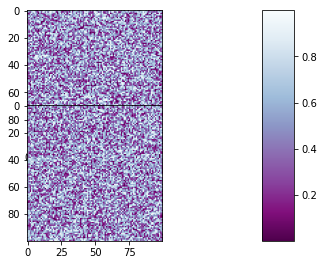

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=-0.3)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()



In [133]:
%matplotlib inline